In [20]:
import pandas as pd
import numpy as np
import wbpy
import plotly 
import matplotlib.pyplot as plt

In [21]:
#Create two files that will be imported
Aid = "Economic_vs_Military.xlsx"
Pop = "SSA.csv"

Pop_df = pd.read_csv(Pop)
Aid_df = pd.read_excel(Aid)

#show Aid data
Aid_df.head()

,Row Labels,Year,Economic,Military,Grand Total
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07


In [22]:
#rename Row Labels column into Country
Aid_df = Aid_df.rename(columns={"Row Labels": "Country"})
Aid_df.head(10)

,Country,Year,Economic,Military,Grand Total
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07
5,Angola,2007,6.191552e+07,512302.664188,6.242783e+07
6,Angola,2008,6.537215e+07,396706.828528,6.576886e+07
7,Angola,2009,6.095525e+07,535667.400000,6.149092e+07
8,Angola,2010,1.114652e+08,417850.218081,1.118831e+08
9,Angola,2011,8.945588e+07,458935.004372,8.991482e+07


In [23]:
#check that all countries are there
Aid_df['Country'].value_counts()

Rwanda          16
Zimbabwe        16
Benin           16
Namibia         16
Ethiopia        16
Ghana           16
Mozambique      16
Senegal         16
Nigeria         16
Kenya           16
Somalia         16
Sierra Leone    16
Madagascar      16
Uganda          16
Burundi         16
South Africa    16
Angola          16
Mali            16
Name: Country, dtype: int64

In [24]:
#show Stability data
Pop_df.head()

,Country,Year,Population
0,Angola,2002,"17,519,417"
1,Angola,2003,"18,121,479"
2,Angola,2004,"18,758,145"
3,Angola,2005,"19,433,602"
4,Angola,2006,"20,149,901"


In [25]:
#rename Row Labels column into Country
Pop_df = Pop_df.rename(columns={"Unnamed: 0": "Year"})
Pop_df.head(10)

,Country,Year,Population
0,Angola,2002,"17,519,417"
1,Angola,2003,"18,121,479"
2,Angola,2004,"18,758,145"
3,Angola,2005,"19,433,602"
4,Angola,2006,"20,149,901"
5,Angola,2007,"20,905,363"
6,Angola,2008,"21,695,634"
7,Angola,2009,"22,514,281"
8,Angola,2010,"23,356,246"
9,Angola,2011,"24,220,661"


In [26]:
#show the table
Pop_df.set_index('Year', drop=True)
Pop_df.head(16)

,Country,Year,Population
0,Angola,2002,"17,519,417"
1,Angola,2003,"18,121,479"
2,Angola,2004,"18,758,145"
3,Angola,2005,"19,433,602"
4,Angola,2006,"20,149,901"
5,Angola,2007,"20,905,363"
6,Angola,2008,"21,695,634"
7,Angola,2009,"22,514,281"
8,Angola,2010,"23,356,246"
9,Angola,2011,"24,220,661"


In [30]:
 #merge Aid and Population tables using the variable Country and Year
Combined_data = pd.merge(Aid_df, Pop_df, on=['Country','Year'])

In [33]:
# Rename Grand Total for Total Aid
Combined_Aid_df_Pop_df = Combined_data.rename(index=str, columns={"Grand Total": "Total Aid"})
Combined_Aid_df_Pop_df.head(10)

,Country,Year,Economic,Military,Total Aid,Population
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,"17,519,417"
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,"18,121,479"
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,"18,758,145"
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,"19,433,602"
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,"20,149,901"
5,Angola,2007,6.191552e+07,512302.664188,6.242783e+07,"20,905,363"
6,Angola,2008,6.537215e+07,396706.828528,6.576886e+07,"21,695,634"
7,Angola,2009,6.095525e+07,535667.400000,6.149092e+07,"22,514,281"
8,Angola,2010,1.114652e+08,417850.218081,1.118831e+08,"23,356,246"
9,Angola,2011,8.945588e+07,458935.004372,8.991482e+07,"24,220,661"


In [35]:
#print the combined table into a csv file
Combined_Aid_df_Pop_df.to_csv(r'outcomes/Aid_df_Pop_df_data.csv')

In [58]:
#Renaming the file as it will include 2 year lag in Economic and Military Aid
#Combined_Aid_df_Pop_df_2 = Combined_Aid_df_Pop_df.rename(index=str, columns={"Economic": "Economic_2", "Military": "Military_2"})
#Combined_Aid_df_Pop_df_4 = Combined_Aid_df_Pop_df.rename(index=str, columns={"Economic": "Economic_4", "Military": "Military_4"})
#Combined_Aid_df_Pop_df_6 = Combined_Aid_df_Pop_df.rename(index=str, columns={"Economic": "Economic_6", "Military": "Military_6"})

#adding two years to see effect
#Combined_Aid_df_Pop_df_2['Economic_2'] = Combined_Aid_df_Pop_df_2['Economic_2'].shift(-2)
#Combined_Aid_df_Pop_df_2['Military_2'] = Combined_Aid_df_Pop_df_2['Military_2'].shift(-2)
#Combined_Aid_df_Pop_df_2= Combined_Aid_df_Pop_df_2.dropna()

#adding four years to see effect
#Combined_Aid_df_Pop_df_4['Economic_4'] = Combined_Aid_df_Pop_df_4['Economic_4'].shift(-4)
#Combined_Aid_df_Pop_df_4['Military_4'] = Combined_Aid_df_Pop_df_4['Military_4'].shift(-4)
#Combined_Aid_df_Pop_df_4= Combined_Aid_df_Pop_df_4.dropna()

#adding six years to see effect
#Combined_Aid_df_Pop_df_6['Economic_6'] = Combined_Aid_df_Pop_df_6['Economic_6'].shift(-6)
#Combined_Aid_df_Pop_df_6['Military_6'] = Combined_Aid_df_Pop_df_6['Military_6'].shift(-6)
#Combined_Aid_df_Pop_df_6= Combined_Aid_df_Pop_df_6.dropna()


In [59]:
#plt.scatter(Combined_Aid_df_Pop_df['Economic'], Combined_Aid_df_Pop_df['Population'], color='green')
#plt.show()

In [62]:
Angola= Combined_Aid_df_Pop_df[(Combined_Aid_df_Pop_df["Country"] == "Angola")].groupby([Combined_Aid_df_Pop_df['Country']])

In [65]:
plt.scatter(Combined_Aid_df_Pop_df['Economoic'], Angola[''], color='green')

KeyError: 'Column not found: '

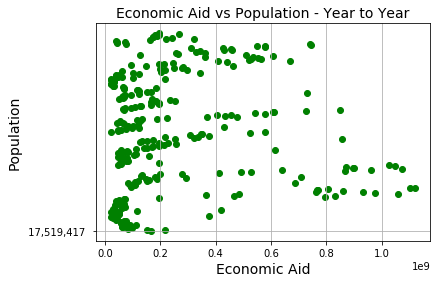

In [46]:
#Scatter Economic vs Population for Year on Year 
plt.scatter(Combined_Aid_df_Pop_df['Economic'], Combined_Aid_df_Pop_df['Population'], color='green')
plt.title('Economic Aid vs Population - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.yticks(np.arange(1000000, step=1000000))
plt.grid(True)
plt.show()

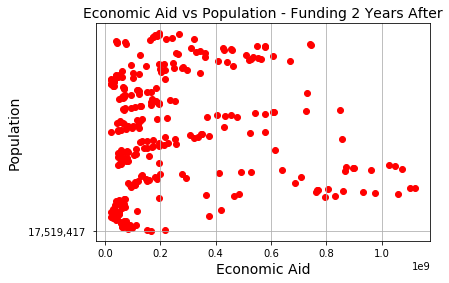

In [47]:
#Scatter Economic vs Population for funding 2 years after 
plt.scatter(Combined_Aid_df_Pop_df['Economic'], Combined_Aid_df_Pop_df['Population'], color='red')
plt.title('Economic Aid vs Population - Funding 2 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.yticks(np.arange(1000000, step=1000000))
plt.grid(True)
plt.show()

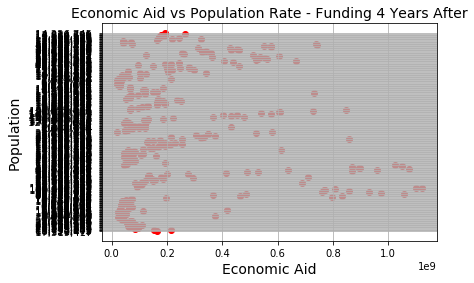

In [42]:
#Scatter Economic vs Population for funding 4 years after 
plt.scatter(Combined_Aid_df_Pop_df['Economic'], Combined_Aid_df_Pop_df['Population'], color='red')
plt.title('Economic Aid vs Population Rate - Funding 4 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.grid(True)
plt.show()